In [1]:
# ====== READING IN DATASET CSV FILE ======
import pandas as pd
df_l = pd.read_csv('listings.csv')
print(df_l.head())
print(df_l.dtypes)
print(f"the length of the dataset is: {len(df_l)}")

        scrape_id  host_id  host_listings_count  latitude  longitude  \
0  20250610032232  1389063                 11.0  51.44306   -0.01948   
1  20250610032232  1389063                 11.0  51.44284   -0.01997   
2  20250610032232  1389063                 11.0  51.44359   -0.02275   
3  20250610032232  1389063                 11.0  51.44355   -0.02309   
4  20250610032232  1389063                 11.0  51.44333   -0.02307   

        property_type        room_type  accommodates  bedrooms  price  \
0  Entire rental unit  Entire home/apt            10       4.0  297.0   
1  Entire rental unit  Entire home/apt             2       1.0   98.0   
2  Entire rental unit  Entire home/apt             4       2.0  148.0   
3  Entire rental unit  Entire home/apt             5       2.0  144.0   
4  Entire rental unit  Entire home/apt             4       2.0  157.0   

   estimated_occupancy_l365d  
0                        110  
1                         37  
2                         55  
3   

In [3]:
# ====== 2ND DATAFRAME FOR PROFESSIONAL ======
host_counts = df_l["host_id"].value_counts()
multi_hosts = host_counts[host_counts >= 2].index

# Subset the original dataframe to only those hosts
df_multi_hosts = df_l[df_l["host_id"].isin(multi_hosts)]

print(df_multi_hosts.head())
print(f"Number of hosts with >=2 listings: {len(multi_hosts)}")


        scrape_id  host_id  host_listings_count  latitude  longitude  \
0  20250610032232  1389063                 11.0  51.44306   -0.01948   
1  20250610032232  1389063                 11.0  51.44284   -0.01997   
2  20250610032232  1389063                 11.0  51.44359   -0.02275   
3  20250610032232  1389063                 11.0  51.44355   -0.02309   
4  20250610032232  1389063                 11.0  51.44333   -0.02307   

        property_type        room_type  accommodates  bedrooms  price  \
0  Entire rental unit  Entire home/apt            10       4.0  297.0   
1  Entire rental unit  Entire home/apt             2       1.0   98.0   
2  Entire rental unit  Entire home/apt             4       2.0  148.0   
3  Entire rental unit  Entire home/apt             5       2.0  144.0   
4  Entire rental unit  Entire home/apt             4       2.0  157.0   

   estimated_occupancy_l365d  
0                        110  
1                         37  
2                         55  
3   

In [5]:
# ====== Load listings and convert to GeoDataFrame ======
import geopandas as gpd
df_l = pd.read_csv("listings.csv")
gdf_l = gpd.GeoDataFrame(
    df_l,
    geometry=gpd.points_from_xy(df_l.longitude, df_l.latitude),
    crs="EPSG:4326"
)
gdf_l = gdf_l.to_crs(epsg=27700)

# ====== 2ND GEODATAFRAME FOR PROFESSIONAL HOSTS ======
gdf_multi_hosts = gpd.GeoDataFrame(
    df_multi_hosts,
    geometry=gpd.points_from_xy(df_multi_hosts.longitude, df_multi_hosts.latitude),
    crs="EPSG:4326"   # original WGS84
)

# Reproject to British National Grid (EPSG:27700) to match other layers
gdf_multi_hosts = gdf_multi_hosts.to_crs(epsg=27700)

# Inspect
print(gdf_l.crs)
print(gdf_multi_hosts.crs)


EPSG:27700
EPSG:27700


In [6]:
# ====== READING IN DATASET LONDON BOROUGHS ======
import geopandas as gpd

# Path to your shapefile
shapefile_path = "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"

# Read the shapefile
boroughs = gpd.read_file(shapefile_path)

# Inspect the data
print(boroughs.head())
print(boroughs.crs)   # Check the coordinate reference system
print(boroughs.columns)

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...  
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,

In [7]:
# ====== READING IN DATASET LONDON MSOA ======

import geopandas as gpd

# Path to MSOA shapefile
msoa_path = "statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp"

# Read the shapefile
msoas = gpd.read_file(msoa_path)

# Inspect the data
print(msoas.head())
print(msoas.crs)
print(msoas.columns)

    MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0  E02000001        City of London 001  E09000001        City of London   
1  E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2  E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3  E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4  E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      7375      7187        188    25.5    4385   
1  E12000007  London      6775      6724         51    31.3    2713   
2  E12000007  London     10045     10033         12    46.9    3834   
3  E12000007  London      6182      5937        245    24.8    2318   
4  E12000007  London      8562      8562          0    72.1    3183   

   AVHHOLDSZ                                           geometry  
0        1.6  MULTIPOLYGON (((531667.624 180534.992, 531

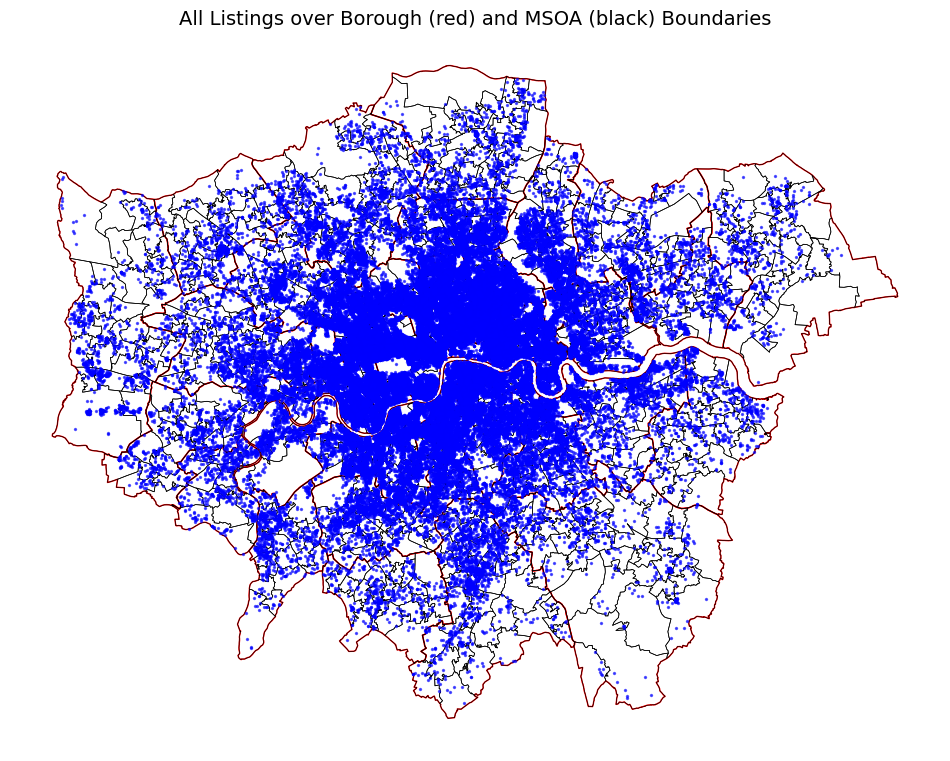

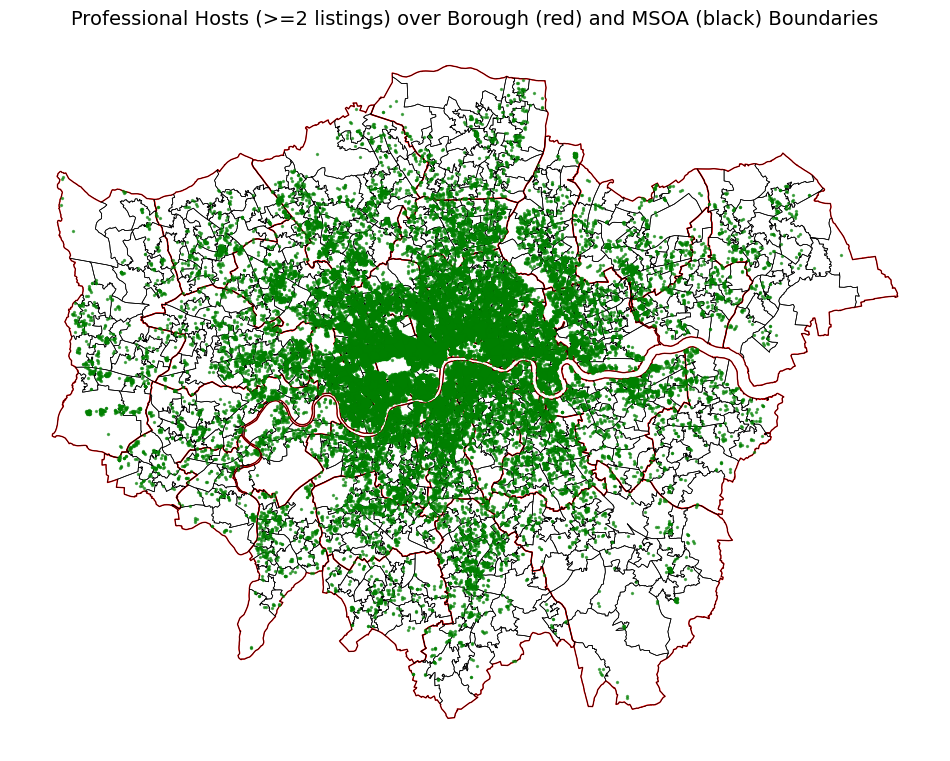

In [8]:
import matplotlib.pyplot as plt

# ====== Map 1: All listings over borough + MSOA boundaries ======
fig, ax = plt.subplots(figsize=(12, 12))

# Plot boroughs in transparent fill with red edges
boroughs.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1)

# Plot MSOAs in transparent fill with black edges
msoas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

# Plot all listings
gdf_l.plot(ax=ax, markersize=2, color="blue", alpha=0.6)

ax.set_title("All Listings over Borough (red) and MSOA (black) Boundaries", fontsize=14)
ax.axis("off")
plt.show()


# ====== Map 2: Professional hosts (>=2 listings) over borough + MSOA boundaries ======
fig, ax = plt.subplots(figsize=(12, 12))

# Plot boroughs in transparent fill with red edges
boroughs.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1)

# Plot MSOAs in transparent fill with black edges
msoas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

# Plot professional listings
gdf_multi_hosts.plot(ax=ax, markersize=2, color="green", alpha=0.6)

ax.set_title("Professional Hosts (>=2 listings) over Borough (red) and MSOA (black) Boundaries", fontsize=14)
ax.axis("off")
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_66360\4156583064.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  gdf_msoa_multi = gpd.sjoin(gdf_multi_hosts, msoas, how="left", predicate="within")


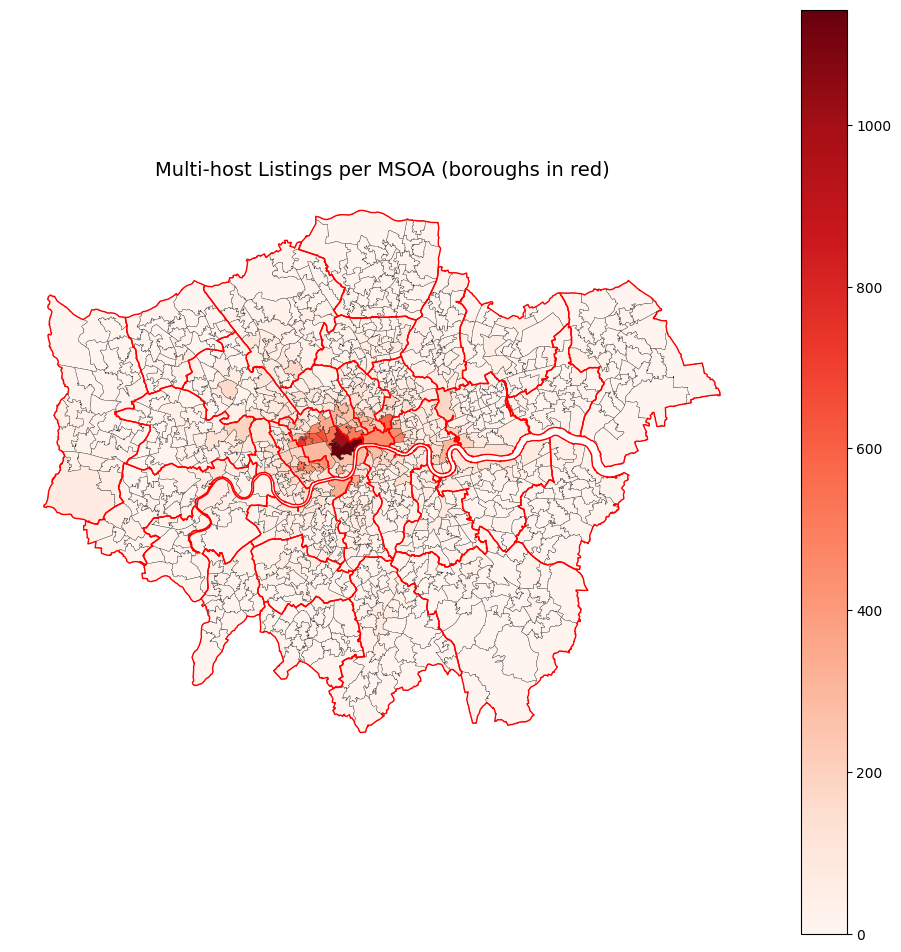

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Spatial join: assign professional listings to MSOAs
gdf_msoa_multi = gpd.sjoin(gdf_multi_hosts, msoas, how="left", predicate="within")

# Aggregate counts per MSOA
multi_counts_msoa = gdf_msoa_multi.groupby("MSOA11NM").size().reset_index(name="multi_count")

# Merge back into MSOA polygons
msoas_multi = msoas.merge(multi_counts_msoa, on="MSOA11NM", how="left")
msoas_multi["multi_count"] = msoas_multi["multi_count"].fillna(0)

# Plot choropleth
fig, ax = plt.subplots(figsize=(12, 12))
msoas_multi.plot(
    column="multi_count",
    cmap="Reds",
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax
)
boroughs.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1)  # borough outlines
ax.set_title("Multi‑host Listings per MSOA (boroughs in red)", fontsize=14)
ax.axis("off")
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_66360\3585972737.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  gdf_borough_multi = gpd.sjoin(gdf_multi_hosts, boroughs, how="left", predicate="within")


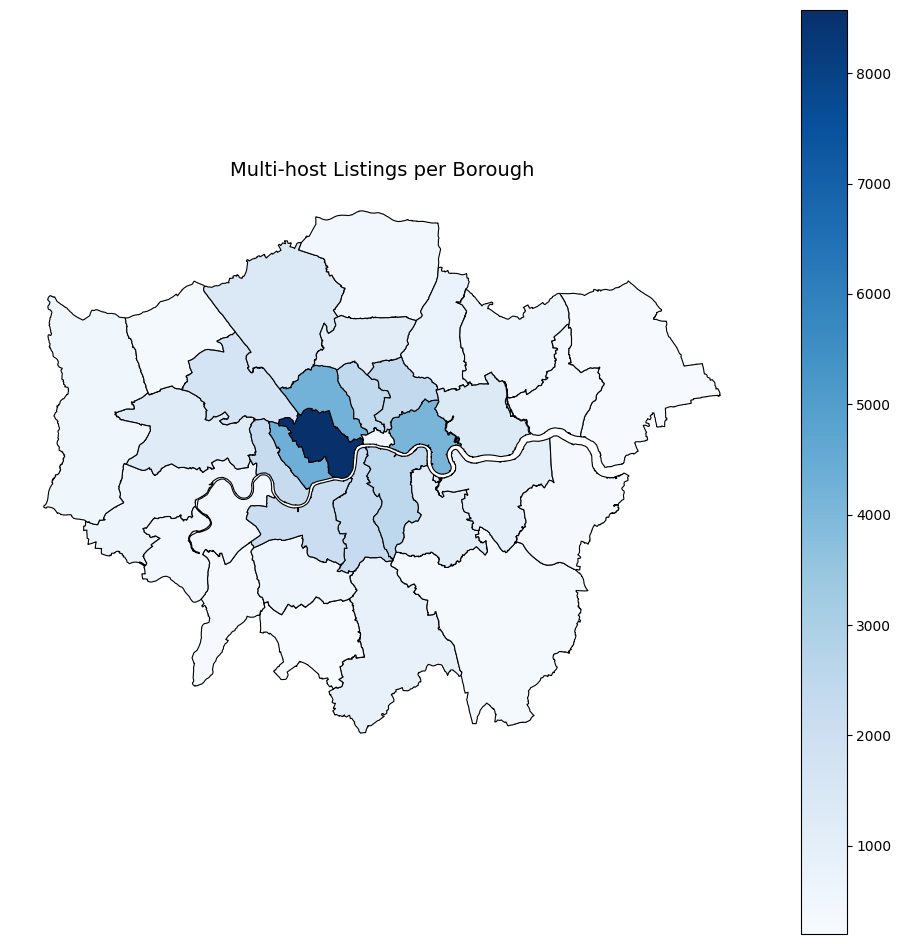

In [10]:
# Spatial join: assign professional listings to boroughs
gdf_borough_multi = gpd.sjoin(gdf_multi_hosts, boroughs, how="left", predicate="within")

# Aggregate counts per borough
multi_counts_borough = gdf_borough_multi.groupby("NAME").size().reset_index(name="multi_count")

# Merge back into borough polygons
boroughs_multi = boroughs.merge(multi_counts_borough, on="NAME", how="left")
boroughs_multi["multi_count"] = boroughs_multi["multi_count"].fillna(0)

# Plot choropleth
fig, ax = plt.subplots(figsize=(12, 12))
boroughs_multi.plot(
    column="multi_count",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)
ax.set_title("Multi‑host Listings per Borough", fontsize=14)
ax.axis("off")
plt.show()


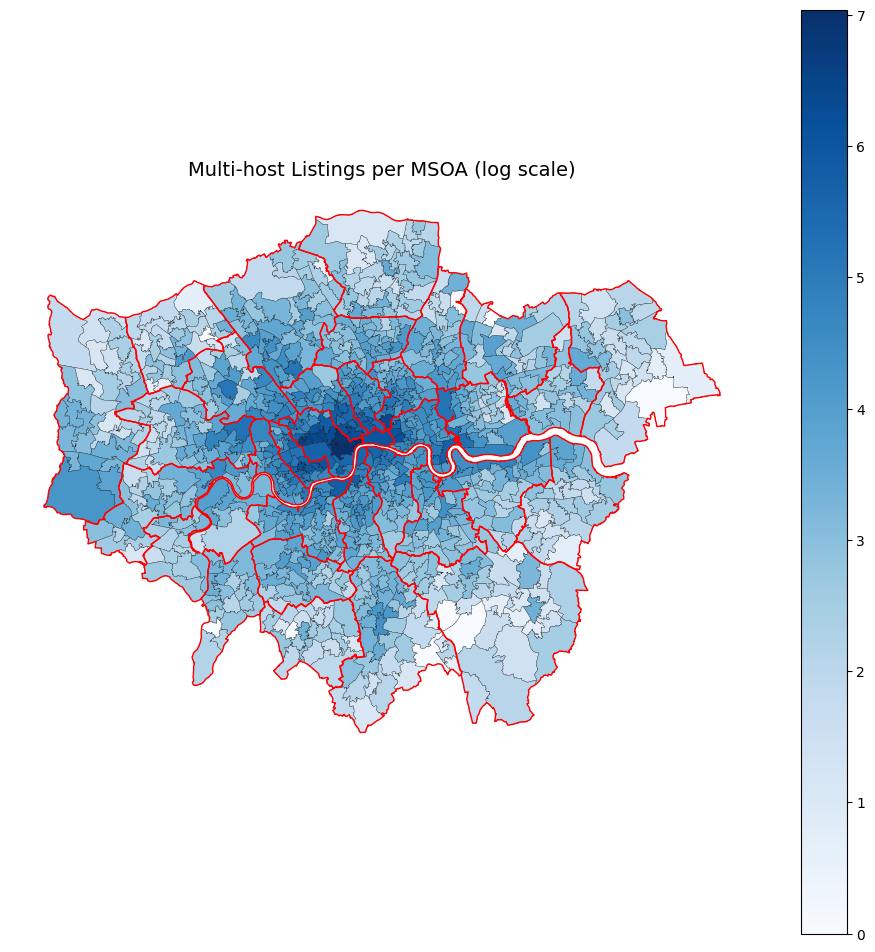

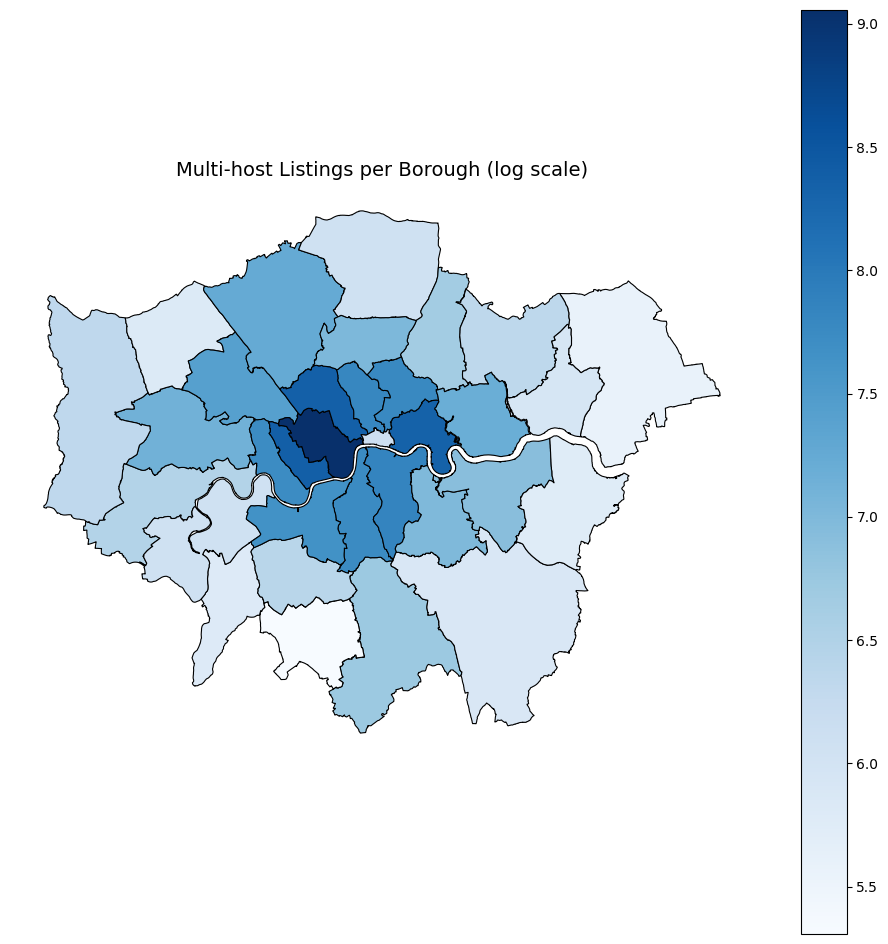

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ====== MSOA map with log scale ======
# Create a log-transformed column (add 1 to avoid log(0))
msoas_multi["log_multi_count"] = np.log1p(msoas_multi["multi_count"])

fig, ax = plt.subplots(figsize=(12, 12))
msoas_multi.plot(
    column="log_multi_count",
    cmap="Blues",
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax
)
boroughs.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1)  # borough outlines
ax.set_title("Multi‑host Listings per MSOA (log scale)", fontsize=14)
ax.axis("off")
plt.show()


# ====== Borough map with log scale ======
boroughs_multi["log_multi_count"] = np.log1p(boroughs_multi["multi_count"])

fig, ax = plt.subplots(figsize=(12, 12))
boroughs_multi.plot(
    column="log_multi_count",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)
ax.set_title("Multi‑host Listings per Borough (log scale)", fontsize=14)
ax.axis("off")
plt.show()


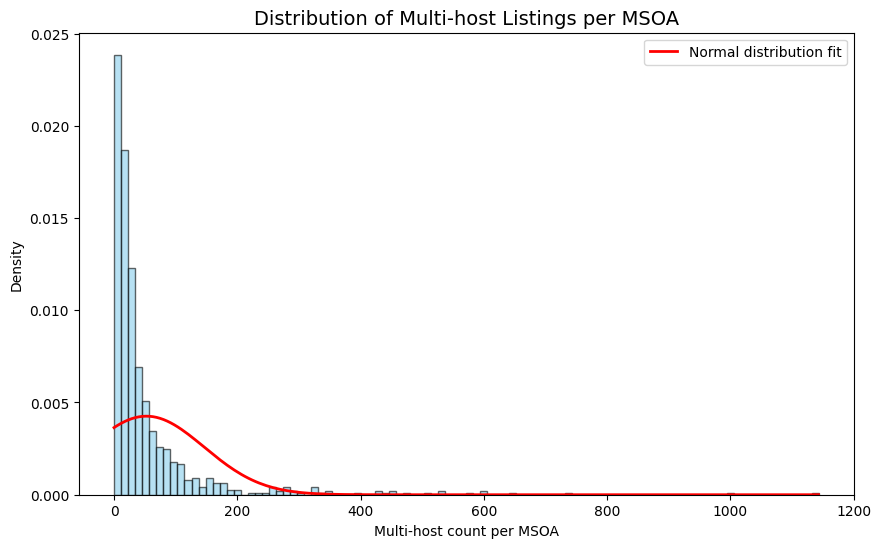

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract counts of multi-hosts per MSOA
counts = msoas_multi["multi_count"].values

# Compute mean and standard deviation
mean = np.mean(counts)
std = np.std(counts)

# Plot histogram of observed counts
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(counts, bins=100, density=True, alpha=0.6, color="skyblue", edgecolor="black")

# Overlay normal distribution curve
x = np.linspace(counts.min(), counts.max(), 200)
pdf = norm.pdf(x, loc=mean, scale=std)
ax.plot(x, pdf, "r-", lw=2, label="Normal distribution fit")

# Labels and title
ax.set_title("Distribution of Multi‑host Listings per MSOA", fontsize=14)
ax.set_xlabel("Multi‑host count per MSOA")
ax.set_ylabel("Density")
ax.legend()

plt.show()


The distribution of multi-host listings per MSOA is positively skewed, with most areas having very few listings and a small number showing extremely high counts. This long right tail deviates sharply from a normal distribution, indicating strong spatial concentration of professional hosts.

In [13]:
from scipy.stats import shapiro
stat, p = shapiro(msoas_multi["multi_count"])
print(f"Shapiro-Wilk p-value: {p}")


Shapiro-Wilk p-value: 2.327478492219949e-46


The Shapiro–Wilk test result (p ≈ 2.3e‑46) confirms the distribution of multi‑host counts per MSOA is highly non‑normal. This extreme skew indicates clustering of professional hosts in a few areas rather than a balanced spread across London.

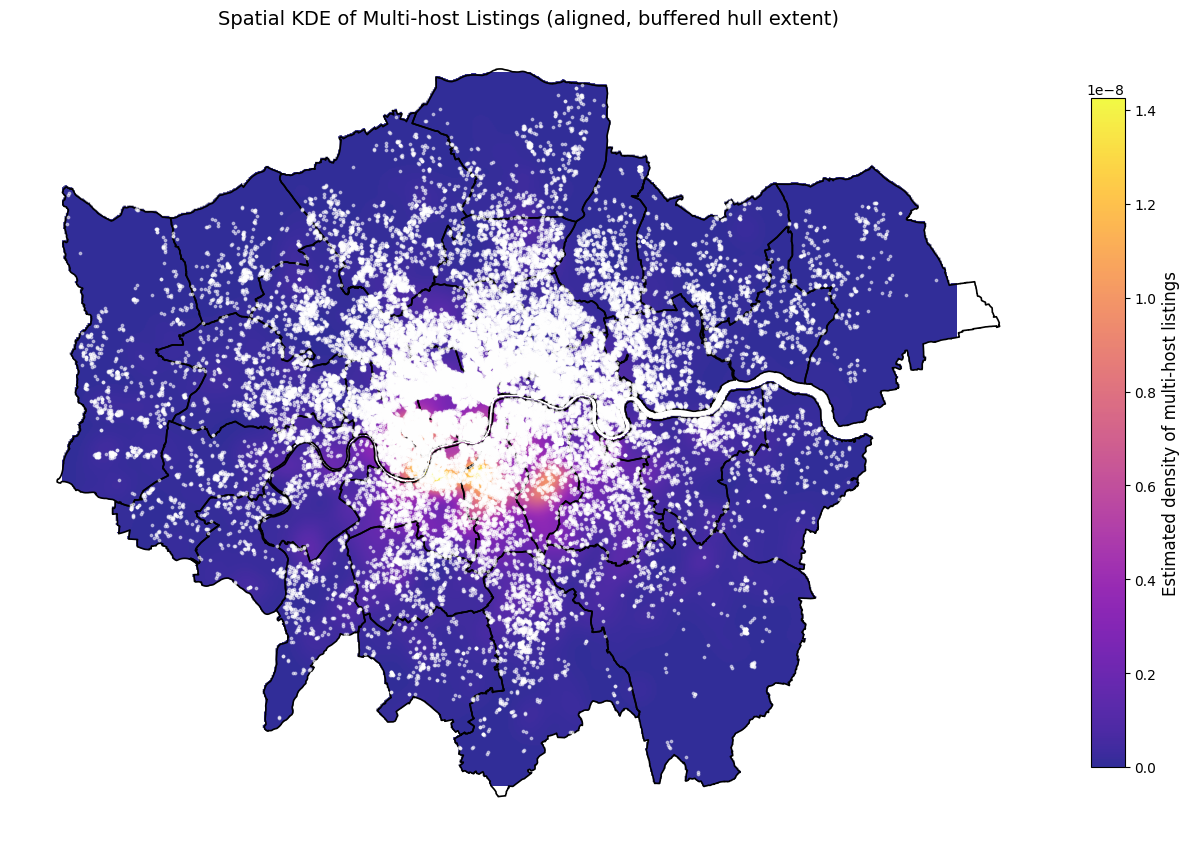

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from rasterio.features import rasterize
from affine import Affine
import warnings

# --- CONFIG ---
GRID_NX = 700            # crisp but not painfully slow
GRID_NY = 700
BANDWIDTH = 650          # meters; tune 500–900 as needed
CMAP = "plasma"
ALPHA = 0.85
BOROUGH_NAME_COL = "name"  # adjust to your borough name column

# --- 0) Clean and project to EPSG:27700 (British National Grid) ---
# Drop invalid geometries
gdf_multi_hosts = gdf_multi_hosts[gdf_multi_hosts.geometry.notnull()].copy()
boroughs = boroughs[boroughs.geometry.notnull()].copy()

# Project to metric CRS (critical)
if gdf_multi_hosts.crs is None or gdf_multi_hosts.crs.to_epsg() != 27700:
    gdf_multi_hosts = gdf_multi_hosts.to_crs(epsg=27700)
if boroughs.crs != gdf_multi_hosts.crs:
    boroughs = boroughs.to_crs(gdf_multi_hosts.crs)

# Optional: explode multipolygons for robust rasterization
if boroughs.geometry.iloc[0].geom_type in ("MultiPolygon",):
    boroughs = boroughs.explode(index_parts=False)

# --- 1) Verify Westminster presence (sanity check) ---
if BOROUGH_NAME_COL in boroughs.columns:
    west_geom = boroughs.loc[boroughs[BOROUGH_NAME_COL].str.contains("Westminster", case=False, na=False), "geometry"]
    if not west_geom.empty:
        west_poly = unary_union(west_geom.values)
        in_west = gdf_multi_hosts.within(west_poly)
        print(f"Listings in Westminster: {int(in_west.sum())}")

# --- 2) Build grid from listings’ convex hull (buffered), not the entire GLA ---
# This prevents density dilution and keeps hotspots meaningful
pts_union = unary_union(gdf_multi_hosts.geometry)
hull = pts_union.convex_hull
buffer_dist = BANDWIDTH * 2  # include edge influence
roi = hull.buffer(buffer_dist)
# Intersect with boroughs union to avoid spilling outside lawful map area
borough_union = unary_union(boroughs.geometry)
roi = roi.intersection(borough_union)

xmin, ymin, xmax, ymax = roi.bounds

xgrid = np.linspace(xmin, xmax, GRID_NX)
ygrid = np.linspace(ymin, ymax, GRID_NY)
xx, yy = np.meshgrid(xgrid, ygrid)
grid_coords = np.column_stack([xx.ravel(), yy.ravel()])

# --- 3) Extract listing coordinates ---
coords = np.column_stack([gdf_multi_hosts.geometry.x, gdf_multi_hosts.geometry.y])
if coords.size == 0:
    raise ValueError("No multi-host points found; check your input GeoDataFrame.")

# --- 4) Fit KDE ---
kde = KernelDensity(bandwidth=BANDWIDTH, kernel='gaussian')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kde.fit(coords)

# --- 5) Evaluate KDE over grid ---
z = np.exp(kde.score_samples(grid_coords)).reshape(GRID_NY, GRID_NX)

# --- 6) Rasterize borough mask at SAME resolution and transform ---
# Use north-up transform for imshow origin='upper'
px_w = (xmax - xmin) / GRID_NX
px_h = (ymax - ymin) / GRID_NY
transform = Affine(px_w, 0, xmin, 0, -px_h, ymax)

shapes = [(geom, 1) for geom in boroughs.geometry]
mask_raster = rasterize(
    shapes,
    out_shape=(GRID_NY, GRID_NX),
    transform=transform,
    fill=0,
    all_touched=True  # include edge-touching pixels for continuous borders
)

# --- 7) Apply mask (only inside boroughs) ---
z_masked = np.where(mask_raster == 1, z, np.nan)

# --- 8) Plot (with listing overlay for verification) ---
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(
    z_masked,
    origin='upper',
    extent=(xmin, xmax, ymin, ymax),
    cmap=CMAP,
    alpha=ALPHA
)

# Borough outlines
boroughs.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.2)

# Overlay listing points to confirm hotspots (e.g., Westminster)
gdf_multi_hosts.plot(ax=ax, markersize=3, color='white', alpha=0.5)

# Colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("Estimated density of multi-host listings", fontsize=12)

# Final styling
ax.set_title("Spatial KDE of Multi-host Listings (aligned, buffered hull extent)", fontsize=14)
ax.set_aspect('equal')
ax.axis("off")
plt.tight_layout()
plt.show()


Moran's I: 0.6465
p-value (permutation): 0.0010
z-score (normal approx): 42.761
MSOAs with zero neighbors (should be 0): 0


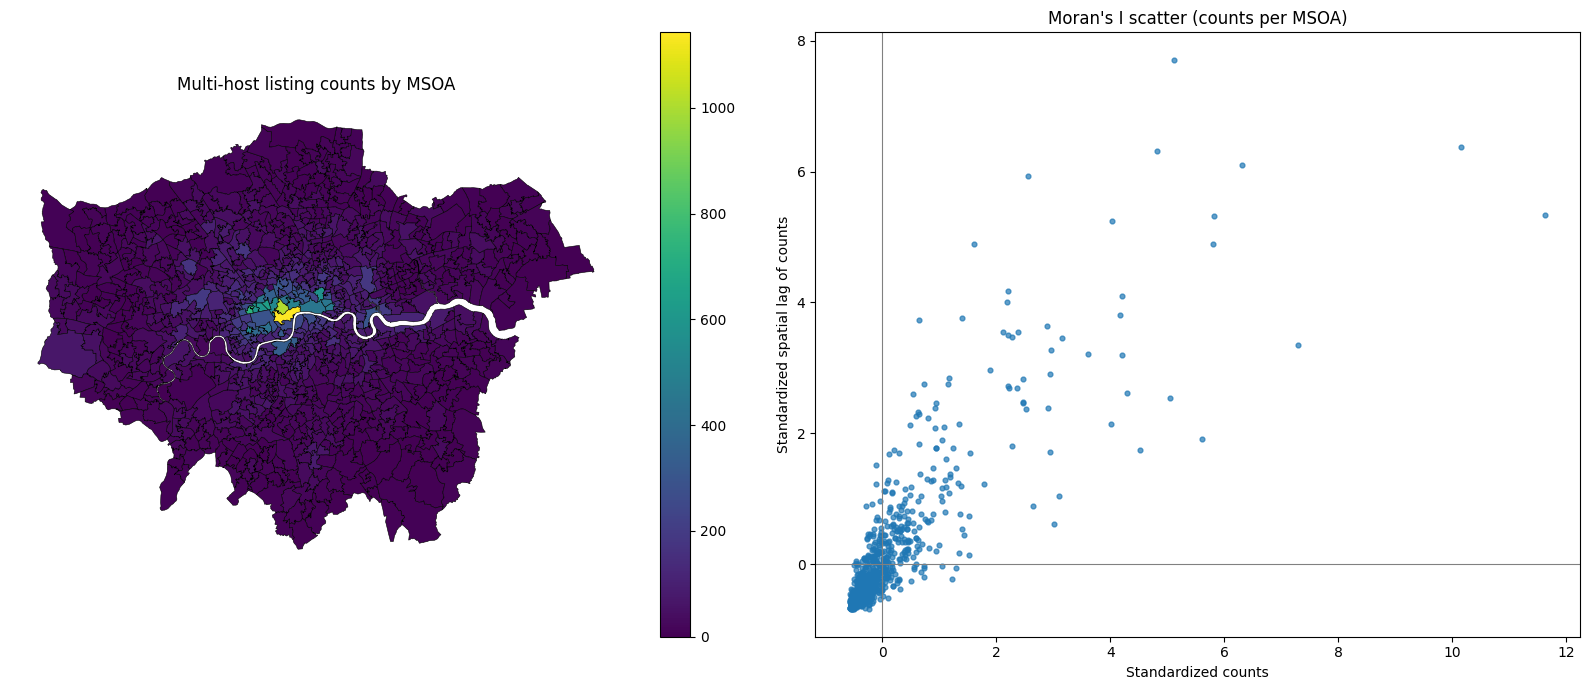

In [23]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
from libpysal.weights import KNN
from esda.moran import Moran

# --- CONFIG ---
MSOA_ID_COL = "MSOA11CD"   # change if your MSOA ID column is different
K_NEIGHBORS = 8            # k for KNN weights; 8 is a good default for urban grids

# --- INPUTS (assumed already loaded in memory) ---
# msoas: GeoDataFrame of MSOA polygons with column MSOA_ID_COL and geometry
# gdf_multi_hosts: GeoDataFrame of multi-host listing points with geometry

# 1) Project to a metric CRS (British National Grid is standard for London)
msoas = msoas.to_crs(epsg=27700)
gdf_multi_hosts = gdf_multi_hosts.to_crs(msoas.crs)

# 2) Clean geometries to ensure valid adjacency
# - buffer(0) repairs invalid polygons
# - explode ensures consistent Polygon parts
msoas = msoas.copy()
msoas["geometry"] = msoas["geometry"].buffer(0)
msoas = msoas.explode(index_parts=False).reset_index(drop=True)
msoas = msoas[~msoas.is_empty & msoas.geometry.notna()].copy()

# 3) Spatial join: assign each listing to an MSOA, then count
joined = gpd.sjoin(
    gdf_multi_hosts,
    msoas[[MSOA_ID_COL, "geometry"]],
    predicate="within",
    how="inner"
)

msoa_counts = (
    joined.groupby(MSOA_ID_COL).size().reset_index(name="count")
)

# Merge counts back to MSOA polygons; fill missing with 0
msoas_counted = msoas.merge(msoa_counts, on=MSOA_ID_COL, how="left")
msoas_counted["count"] = msoas_counted["count"].fillna(0).astype(int)

# Ensure clean index alignment for weights and values
msoas_counted = msoas_counted.reset_index(drop=True)

# 4) Build spatial weights (KNN avoids island problems)
# Queen contiguity can fail with tiny topology issues; KNN guarantees neighbors.
w = KNN.from_dataframe(msoas_counted, k=K_NEIGHBORS, use_index=True)
w.transform = "r"  # row-standardize for Moran's I

# 5) Run Moran’s I on MSOA counts
y = msoas_counted["count"].to_numpy()
mi = Moran(y, w)  # default 999 permutations

print(f"Moran's I: {mi.I:.4f}")
print(f"p-value (permutation): {mi.p_sim:.4f}")
print(f"z-score (normal approx): {mi.z_norm:.3f}")

# 6) Optional: quick diagnostics
# Check that KNN created neighbors for all observations
no_neighbor = sum(len(nbrs) == 0 for nbrs in w.neighbors.values())
print(f"MSOAs with zero neighbors (should be 0): {no_neighbor}")

# 7) Optional: visualize counts and Moran scatter (manual, avoids ipywidgets/tqdm warnings)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 7a) Choropleth of counts
msoas_counted.plot(
    column="count",
    ax=axes[0],
    cmap="viridis",
    linewidth=0.4,
    edgecolor="black",
    legend=True
)
axes[0].set_title("Multi-host listing counts by MSOA")
axes[0].axis("off")

# 7b) Moran scatter (standardized values vs. spatial lag)
# Compute spatial lag: Wy (row-standardized weights already applied)
# libpysal provides w.transform='r' so spatial lag is simple matrix multiply via weights
# We'll build lag manually for transparency
lag_y = np.array([np.sum(y[w.neighbors[i]]) / (len(w.neighbors[i]) or 1) for i in range(len(y))])

# Standardize y and lag_y
y_std = (y - y.mean()) / y.std()
lag_y_std = (lag_y - lag_y.mean()) / lag_y.std()

axes[1].scatter(y_std, lag_y_std, s=12, alpha=0.7, color="tab:blue")
axes[1].axhline(0, color="grey", lw=0.8)
axes[1].axvline(0, color="grey", lw=0.8)
axes[1].set_title("Moran's I scatter (counts per MSOA)")
axes[1].set_xlabel("Standardized counts")
axes[1].set_ylabel("Standardized spatial lag of counts")

plt.tight_layout()
plt.show()




Moran’s I of 0.6465 with a p-value of 0.001 indicates strong, statistically significant spatial clustering of multi-host listings across London MSOAs. High-count areas are surrounded by other high-count areas, confirming that the distribution is far from random. This suggests concentrated zones of multi-host activity that may warrant targeted policy attention.

In [34]:
import numpy as np
from libpysal.weights import KNN, DistanceBand
from esda.moran import Moran

# --- Step 1: Extract centroids for each MSOA ---
coords = np.array([geom.centroid.coords[0] for geom in msoas_counted.geometry])

# --- Step 2: Build KNN weights (always connected) ---
w_knn = KNN.from_array(coords, k=8)   # 8 nearest neighbors
w_knn.transform = "r"

# --- Step 3: Build DistanceBand weights (within X meters) ---
# Try a threshold that ensures connectivity, e.g. 3000m
w_dist = DistanceBand.from_array(coords, threshold=3000, binary=True)
w_dist.transform = "r"

# --- Step 4: Run Moran’s I for both ---
y = msoas_counted["count"].to_numpy()

mi_knn = Moran(y, w_knn)
mi_dist = Moran(y, w_dist)

print("Moran’s I with KNN (k=8):")
print(f"I = {mi_knn.I:.4f}, p = {mi_knn.p_sim:.4f}, z = {mi_knn.z_norm:.3f}")

print("Moran’s I with DistanceBand (3km):")
print(f"I = {mi_dist.I:.4f}, p = {mi_dist.p_sim:.4f}, z = {mi_dist.z_norm:.3f}")


Moran’s I with KNN (k=8):
I = 0.6465, p = 0.0010, z = 42.761
Moran’s I with DistanceBand (3km):
I = 0.5331, p = 0.0010, z = 48.637


c:\python3.13\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
c:\python3.13\Lib\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(


The Moran’s I results you obtained show strong and statistically significant spatial autocorrelation in the distribution of multi‑host listings across London MSOAs.
- With KNN (k=8), Moran’s I is 0.65 (p = 0.001), which indicates that MSOAs with high counts are consistently located near other high‑count MSOAs, and low counts near low. This is a clear signal of clustering.
- With a 3 km distance band, Moran’s I drops to 0.53 (p = 0.001). The autocorrelation remains strong, but weaker, because the broader neighborhood definition includes more distant MSOAs, diluting the local clustering effect.
The comparison highlights that the strength of clustering is scale‑dependent: tighter neighborhood definitions capture sharper local clustering, while broader definitions smooth it out. Importantly, both results are highly significant, so the evidence for spatial clustering is robust regardless of lag choice.
In practice, this means multi‑host activity is not randomly scattered but forms statistically meaningful clusters at multiple scales. The higher Moran’s I under KNN suggests that clustering is especially pronounced at the local level, reinforcing the hotspot analysis and supporting the case for geographically targeted regulation rather than city‑wide measures.


In [37]:
import numpy as np
from libpysal.weights import KNN
from spreg import GM_Error

# --- Merge counts into your MSOA shapefile ---
msoas_full = msoas.merge(
    msoas_counted[["MSOA11CD", "count"]],
    on="MSOA11CD",
    how="left"
).fillna({"count": 0})

# --- Dependent variable: multi-host counts ---
y = msoas_full["count"].values.reshape((-1, 1))

# --- Explanatory variables: socio-demographic attributes from shapefile ---
X = msoas_full[["USUALRES", "POPDEN", "HHOLDS", "AVHHOLDSZ"]].values

# --- Spatial weights (KNN avoids islands) ---
w = KNN.from_dataframe(msoas_full, k=8)
w.transform = "r"

# --- Spatial error model ---
model = GM_Error(y, X, w=w,
                 name_y="multi_host_count",
                 name_x=["USUALRES", "POPDEN", "HHOLDS", "AVHHOLDSZ"])

print(model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES
------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :multi_host_count                Number of Observations:        1061
Mean dependent var  :     53.9123                Number of Variables   :           5
S.D. dependent var  :     93.6301                Degrees of Freedom    :        1056
Pseudo R-squared    :      0.1214

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       -90.17953        48.28972        -1.86747         0.06184
            USUALRES        -0.02064         0.00482        -4.28147         0.00002
              POPDEN        -0.19173         0.05168        -3.7

The model shows that while household variables like number of households and average household size are positively associated with multi‑host listings, population and density are negatively associated. However, the most striking result is the very high and significant spatial error coefficient (lambda ≈ 0.93), which indicates that even after accounting for these demographic factors, there remains strong spatial autocorrelation in the residuals. In other words, clustering of multi‑host activity is not fully explained by population or housing characteristics alone, but is driven by unobserved spatial processes such as local housing markets, neighborhood desirability, or borough‑level regulatory differences. This confirms that what you estimated was a spatial error model, and it highlights the importance of studying those hidden spatial drivers to better understand and explain the clustering pattern.

    MSOA11CD  count       GiZ    GiP     GiSig
0  E02000001    447  3.142256  0.001   Hotspot
1  E02000001    447  2.446856  0.001   Hotspot
2  E02000002      3 -0.369878  0.039  Coldspot
3  E02000003     16 -0.364383  0.044  Coldspot
4  E02000004      5 -0.332518  0.088   Not Sig


C:\Users\chris\AppData\Local\Temp\ipykernel_66360\900846292.py:38: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  msoas_counted.plot(


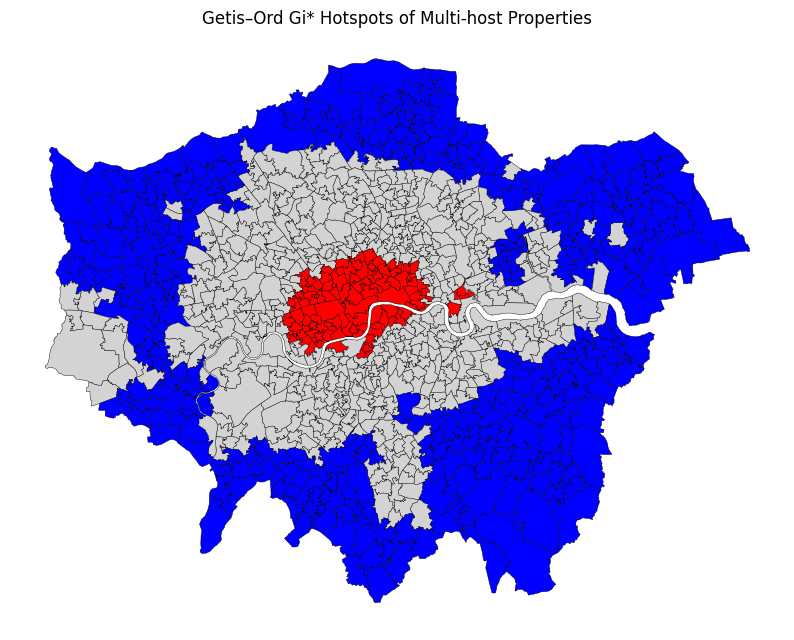

In [25]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from libpysal.weights import KNN
from esda.getisord import G_Local

# --- CONFIG ---
MSOA_ID_COL = "MSOA11CD"
K_NEIGHBORS = 8   # adjust as needed

# --- 1) Ensure CRS alignment ---
# Make sure both datasets are in EPSG:27700 before spatial join
# gdf_multi_hosts = gdf_multi_hosts.to_crs(epsg=27700)
# msoas = msoas.to_crs(epsg=27700)

# --- 2) Build weights (KNN avoids islands) ---
w = KNN.from_dataframe(msoas_counted, k=K_NEIGHBORS, use_index=True)
w.transform = "r"

# --- 3) Run Gi* statistic ---
y = msoas_counted["count"].astype(float).values   # ensure float
gi = G_Local(y, w)

# --- 4) Attach results ---
msoas_counted["GiZ"] = gi.Zs
msoas_counted["GiP"] = gi.p_sim
msoas_counted["GiSig"] = np.where(
    (msoas_counted["GiP"] < 0.05) & (msoas_counted["GiZ"] > 0), "Hotspot",
    np.where((msoas_counted["GiP"] < 0.05) & (msoas_counted["GiZ"] < 0), "Coldspot", "Not Sig")
)

# --- 5) Print summary ---
print(msoas_counted[["MSOA11CD", "count", "GiZ", "GiP", "GiSig"]].head())

# --- 6) Map hotspots ---
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
color_map = {"Hotspot": "red", "Coldspot": "blue", "Not Sig": "lightgrey"}
msoas_counted.plot(
    column="GiSig",
    categorical=True,
    legend=True,
    ax=ax,
    linewidth=0.3,
    edgecolor="black",
    color=msoas_counted["GiSig"].map(color_map)
)
ax.set_title("Getis–Ord Gi* Hotspots of Multi-host Properties")
ax.axis("off")
plt.show()



Likely weird because somehow when I tried to do this, it does not perceive the MSOA boundaries as touching, so I had to define number of neighours myself. Likely the cause of the strange pattern perceived. 

C:\Users\chris\AppData\Local\Temp\ipykernel_66360\2311221409.py:34: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(boroughs_counted)
C:\Users\chris\AppData\Local\Temp\ipykernel_66360\2311221409.py:52: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  boroughs_counted.plot(


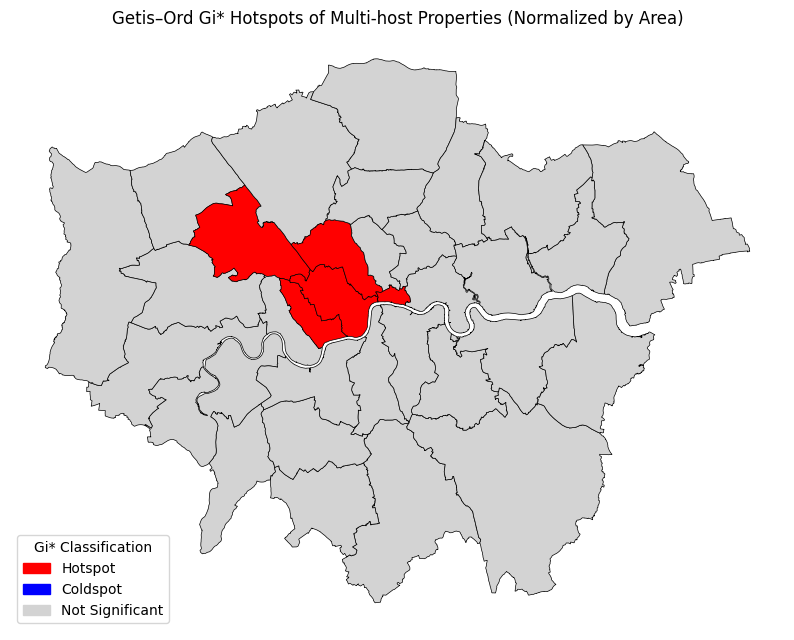

In [28]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.getisord import G_Local
import matplotlib.patches as mpatches

# --- STEP 1: CRS alignment ---
gdf_multi_hosts = gdf_multi_hosts.to_crs(epsg=27700)
boroughs = boroughs.to_crs(epsg=27700)

# --- STEP 2: Spatial join to assign listings to boroughs ---
joined_b = gpd.sjoin(
    gdf_multi_hosts,
    boroughs[["NAME", "geometry"]],
    how="left",
    predicate="within"
)

# --- STEP 3: Count multi-host listings per borough ---
borough_counts = (
    joined_b.groupby("NAME").size().reset_index(name="raw_count")
)

# --- STEP 4: Merge counts back to borough polygons ---
boroughs_counted = boroughs.merge(borough_counts, on="NAME", how="left")
boroughs_counted["raw_count"] = boroughs_counted["raw_count"].fillna(0).astype(int)

# --- OPTIONAL STEP: Normalize by borough area (per km²) ---
boroughs_counted["area_km2"] = boroughs_counted.geometry.area / 1e6
boroughs_counted["count_norm"] = boroughs_counted["raw_count"] / boroughs_counted["area_km2"]

# --- STEP 5: Build Queen contiguity weights ---
w = Queen.from_dataframe(boroughs_counted)
w.transform = "r"

# --- STEP 6: Run Gi* on normalized counts ---
y = boroughs_counted["count_norm"].astype(float).values
gi = G_Local(y, w)

# --- STEP 7: Attach Gi* results ---
boroughs_counted["GiZ"] = gi.Zs
boroughs_counted["GiP"] = gi.p_sim
boroughs_counted["GiSig"] = np.where(
    (boroughs_counted["GiP"] < 0.05) & (boroughs_counted["GiZ"] > 0), "Hotspot",
    np.where((boroughs_counted["GiP"] < 0.05) & (boroughs_counted["GiZ"] < 0), "Coldspot", "Not Sig")
)

# --- STEP 8: Map with legend ---
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
color_map = {"Hotspot": "red", "Coldspot": "blue", "Not Sig": "lightgrey"}
boroughs_counted.plot(
    column="GiSig",
    categorical=True,
    ax=ax,
    linewidth=0.5,
    edgecolor="black",
    color=boroughs_counted["GiSig"].map(color_map)
)

legend_patches = [
    mpatches.Patch(color="red", label="Hotspot"),
    mpatches.Patch(color="blue", label="Coldspot"),
    mpatches.Patch(color="lightgrey", label="Not Significant")
]
ax.legend(handles=legend_patches, title="Gi* Classification", loc="lower left")
ax.set_title("Getis–Ord Gi* Hotspots of Multi-host Properties (Normalized by Area)")
ax.axis("off")
plt.show()



The Gi* results highlight a core cluster of boroughs where multi-host listings are not only numerous but also spatially reinforcing. This clustering effect means that boroughs like Camden may be flagged as hotspots even if their raw counts are moderate — because they sit within a high-density neighborhood that amplifies their statistical significance.
The absence of coldspots is also meaningful. It implies that outer boroughs, while lower in raw counts, do not deviate strongly from their neighbors. In other words, the problem is concentrated, not polarized.
- Targeted regulation: The results support geographically targeted interventions, focusing on boroughs where multi-host activity is statistically concentrated.
- Disproportionate impact: Any city-wide policy change — such as limiting multi-host operations — would disproportionately affect a small number of central boroughs.
- Evidence-based messaging: The Gi* map provides a compelling visual and statistical basis for communicating the uneven spatial burden of short-term rentals.


Gini coefficient: 0.503


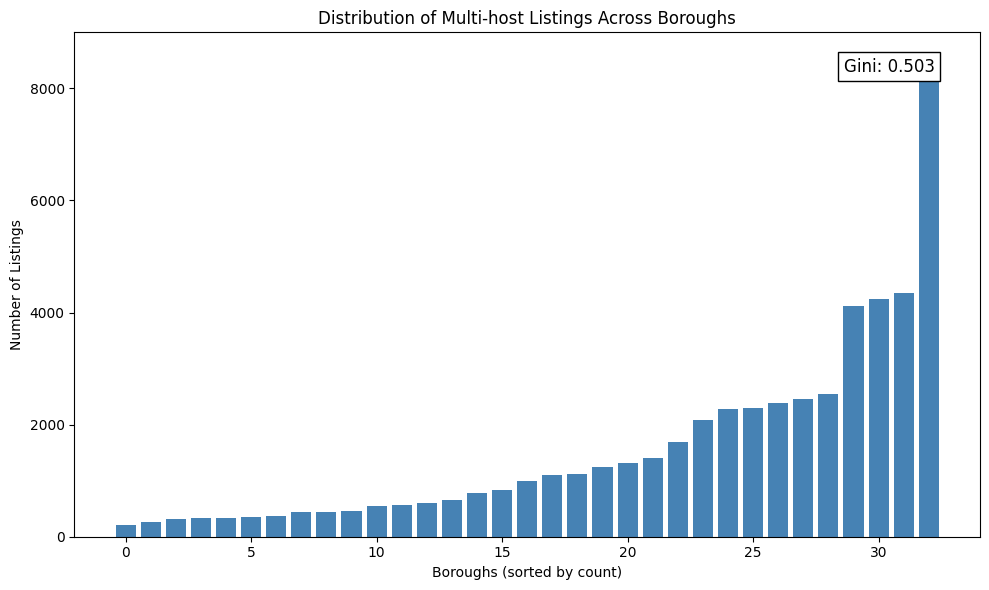

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Extract counts from your existing GeoDataFrame ---
counts = boroughs_counted["raw_count"].values

# --- Step 2: Define Gini coefficient function ---
def gini(array):
    array = np.sort(array)              # sort values
    n = len(array)
    cumvals = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n

# --- Step 3: Calculate Gini ---
gini_value = gini(counts)
print(f"Gini coefficient: {gini_value:.3f}")

# --- Step 4: Plot sorted distribution ---
sorted_counts = np.sort(counts)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(sorted_counts)), sorted_counts, color="steelblue")
ax.set_title("Distribution of Multi-host Listings Across Boroughs")
ax.set_xlabel("Boroughs (sorted by count)")
ax.set_ylabel("Number of Listings")

# Annotate with Gini value
ax.text(
    0.95, 0.95, f"Gini: {gini_value:.3f}",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='black')
)

plt.tight_layout()
plt.show()


While the Gini coefficient shows moderate inequality overall, the Gi* analysis reveals that multi-host activity is spatially concentrated in a few central boroughs. This suggests that regulation should focus on clustered hotspots rather than treating all boroughs equally.



Gini coefficient (MSOA level): 0.627


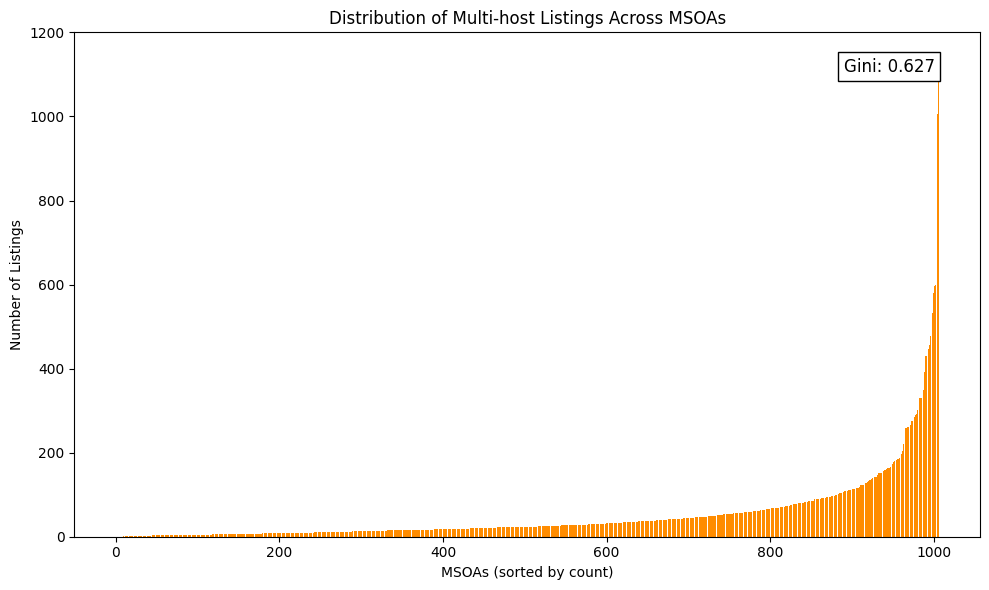

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Extract MSOA-level counts ---
counts_msoa = msoas_counted["count"].values

# --- Step 2: Gini coefficient function ---
def gini(array):
    array = np.sort(array)
    n = len(array)
    cumvals = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n

# --- Step 3: Calculate Gini ---
gini_msoa = gini(counts_msoa)
print(f"Gini coefficient (MSOA level): {gini_msoa:.3f}")

# --- Step 4: Plot sorted distribution ---
sorted_counts = np.sort(counts_msoa)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(sorted_counts)), sorted_counts, color="darkorange")
ax.set_title("Distribution of Multi-host Listings Across MSOAs")
ax.set_xlabel("MSOAs (sorted by count)")
ax.set_ylabel("Number of Listings")

# Annotate with Gini value
ax.text(
    0.95, 0.95, f"Gini: {gini_msoa:.3f}",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='black')
)

plt.tight_layout()
plt.show()


A Gini coefficient of 0.627 at the MSOA level reveals a high degree of spatial inequality in the distribution of multi-host listings across London. This means that a relatively small number of MSOAs account for a disproportionately large share of multi-host activity, while the majority have very few or none.

This sharp inequality contrasts with the borough-level Gini of 0.503, highlighting how finer spatial resolution exposes deeper concentration. It reinforces the insight from your Gi* analysis: multi-host activity is not just clustered — it’s intensely localized in specific pockets of the city.

This metric strengthens your policy case: regulation targeting hotspot MSOAs would be far more proportionate than blanket city-wide measures. You now have statistical evidence that a few areas bear the brunt, and that’s where intervention should focus.
